## Decision Tree & Random Forest Implementation in Python

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve
import warnings
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [21]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

In [22]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 1.Exploratory Data Analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [25]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [26]:
pd.set_option("display.float_format","{:.2f}".format)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [27]:
null_feat = pd.DataFrame(len(df['Attrition']) - df.isnull().sum(), columns = ['Count'])
trace = go.Bar(x = null_feat.index, y = null_feat["Count"], opacity = 0.8, marker=dict(color = 'red',
                                                                                     line= dict(color='#000000',width=1.5)))
layout = dict(title = "Missing Values")
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

### larget Distribution %

In [28]:
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]

In [29]:
trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of attrition variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [30]:
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [31]:
df.drop(['EmployeeCount', 'EmployeeNumber','Over18','StandardHours'],axis="columns", inplace=True)

In [32]:
categorical_col  = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("=====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


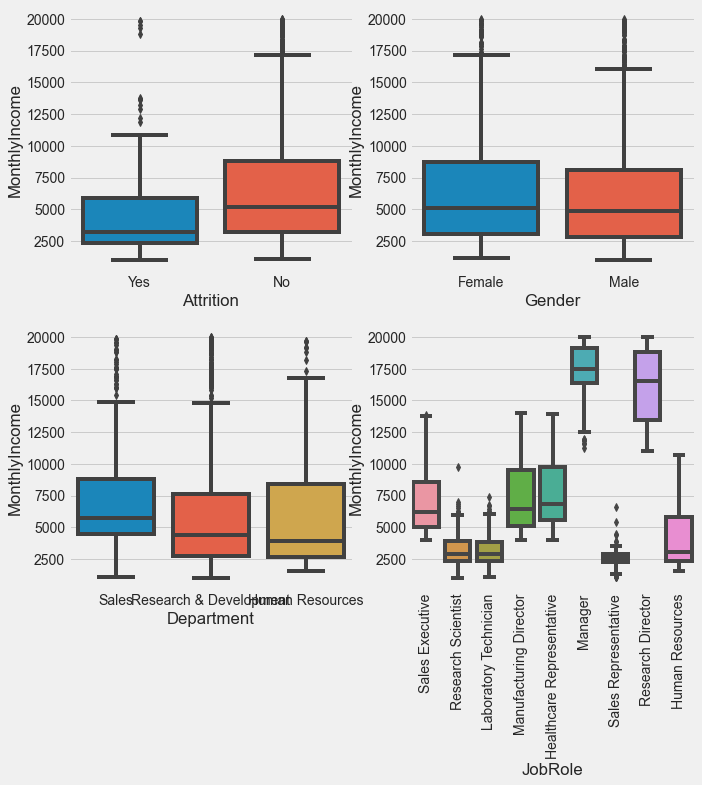

In [33]:
# Display multiple box plots
fig, ax = plt.subplots(2,2, figsize = (10,10))
sns.boxplot(df['Attrition'], df['MonthlyIncome'], ax = ax[0,0])
sns.boxplot(df['Gender'], df['MonthlyIncome'], ax = ax[0,1])
plt.xticks(rotation=90)
sns.boxplot(df['Department'], df['MonthlyIncome'],ax = ax[1,0])
plt.xticks(rotation=90)
sns.boxplot(df['JobRole'], df['MonthlyIncome'], ax = ax[1,1])
plt.show()

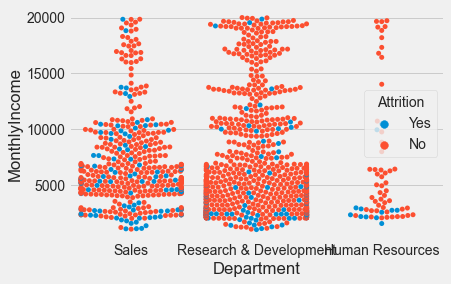

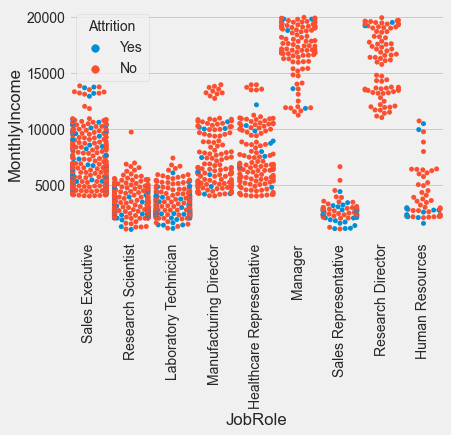

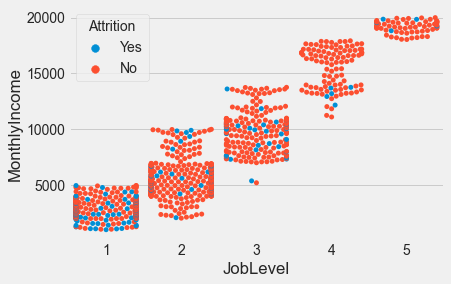

In [34]:
sns.swarmplot(x = 'Department', y = 'MonthlyIncome',hue= 'Attrition', data= df)
plt.show()
sns.swarmplot(x= 'JobRole', y = 'MonthlyIncome', hue= 'Attrition', data=df)
plt.xticks(rotation=90)
plt.show()

sns.swarmplot(x='JobLevel', y='MonthlyIncome', hue= 'Attrition', data=df)
plt.show()

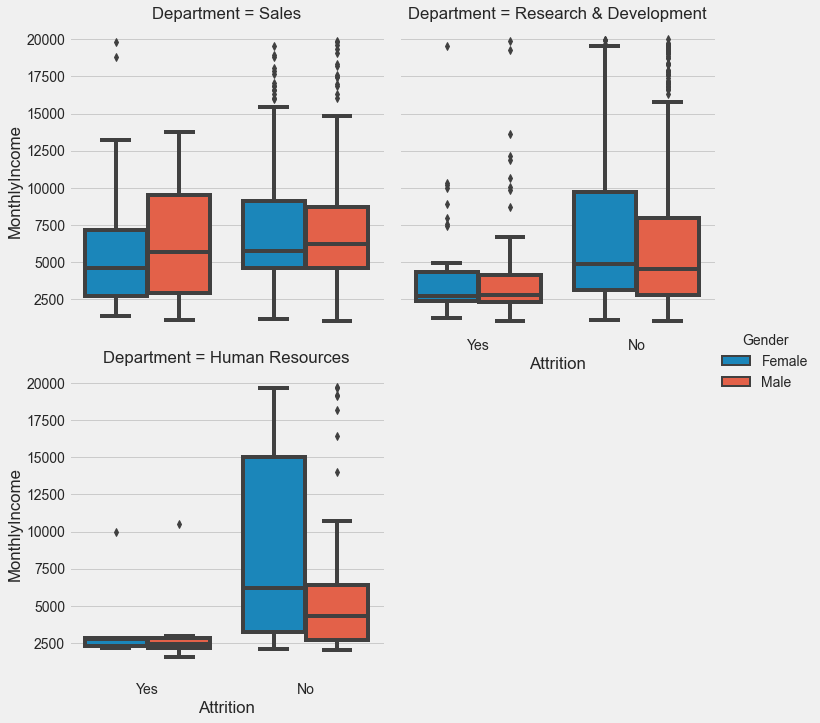

In [35]:
sns.factorplot(x = 'Attrition',       # categorical
               y = 'MonthlyIncome',   # Continuous
               hue = 'Gender',        # categorical
               col = 'Department',
               col_wrap=2,
               kind = 'box',
               data = df)
plt.show()

In [36]:
df['Attrition'] = df.Attrition.astype("category").cat.codes 

In [37]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

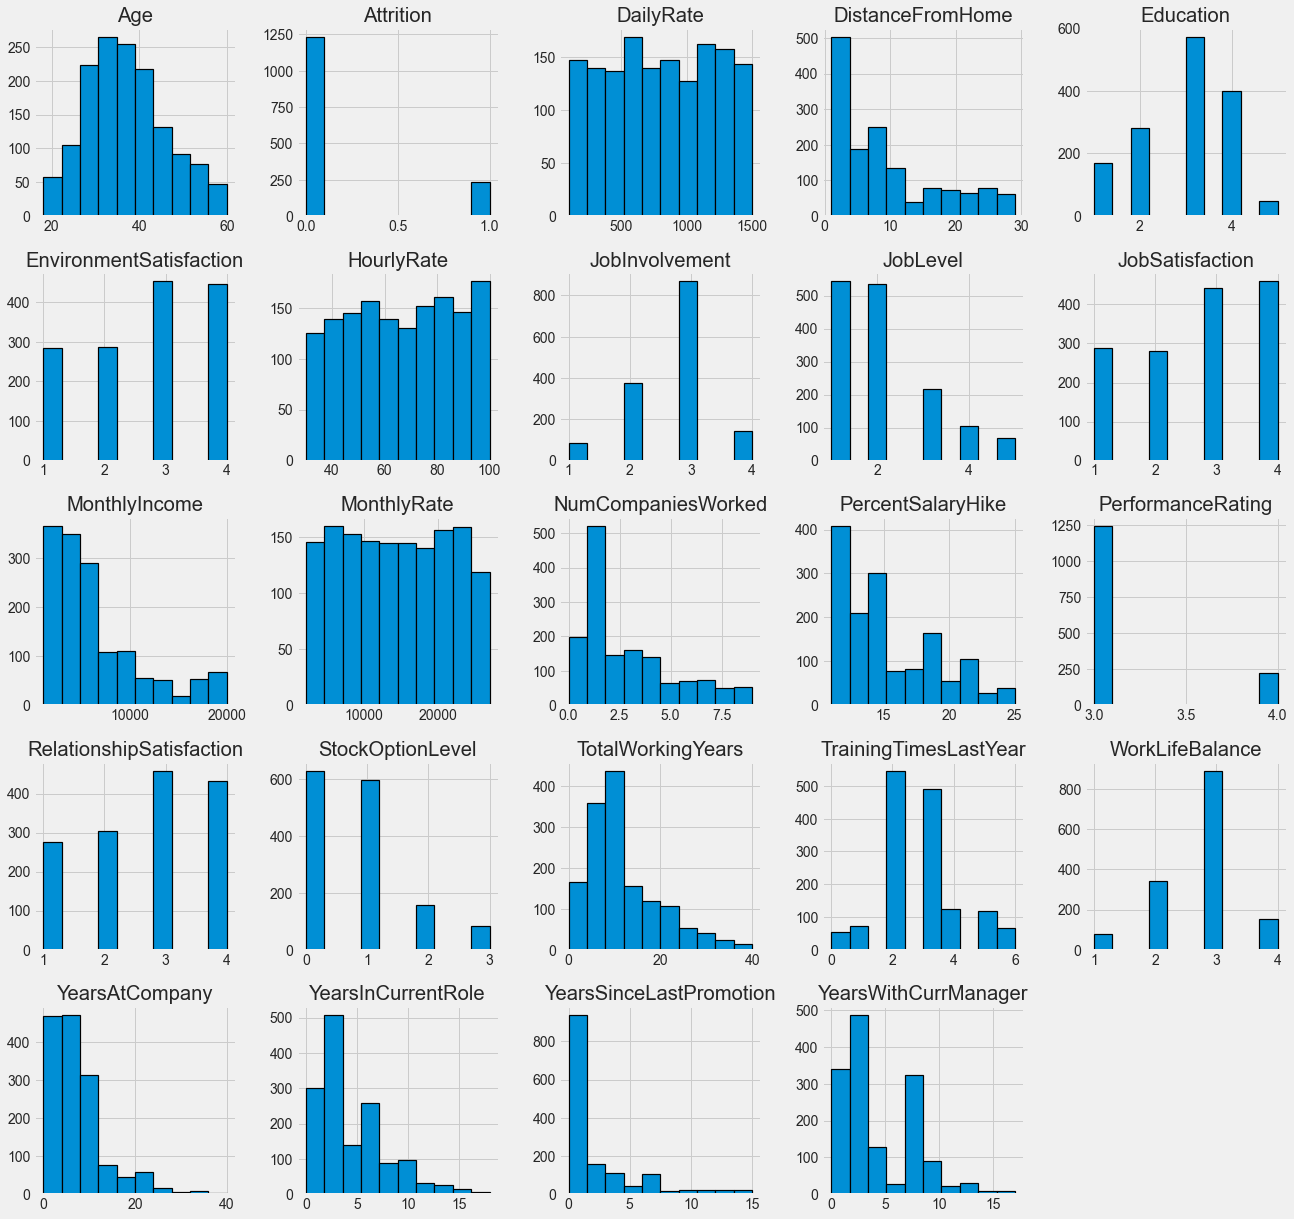

In [38]:
# Visulazing the distibution of the data for ever feature
df.hist(edgecolor='black',linewidth=1.2, figsize=(20,20));

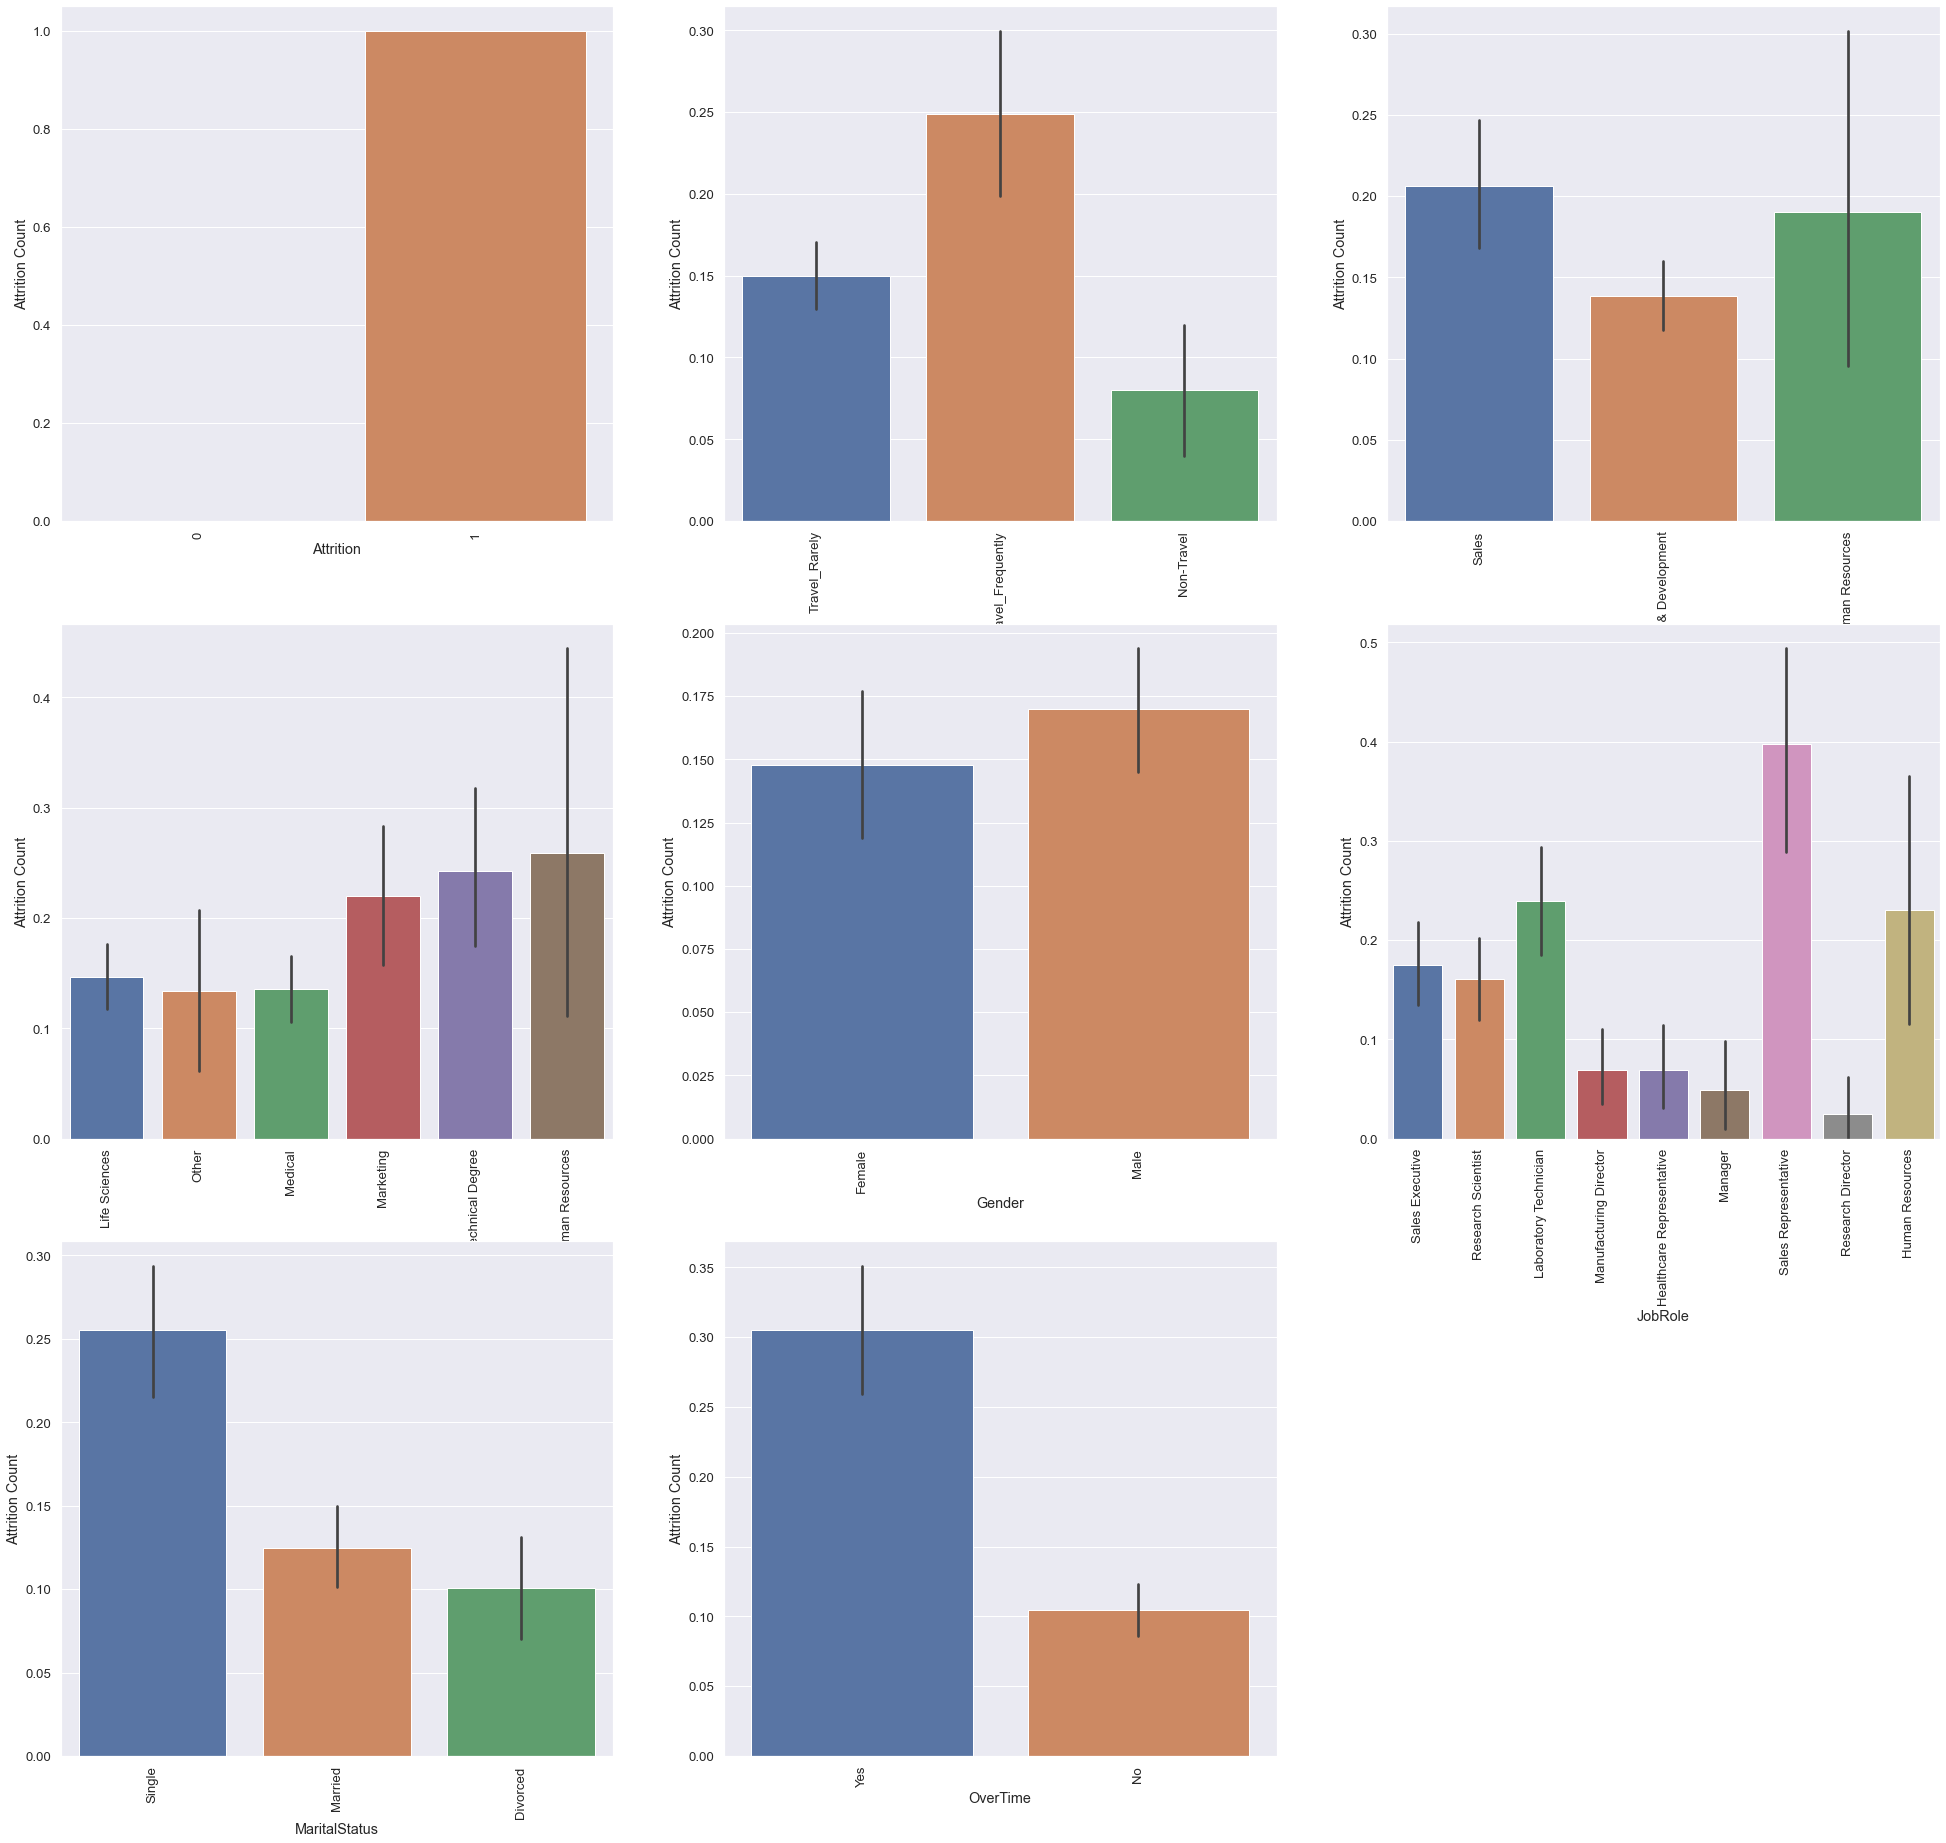

In [39]:
#Plotting how feature correlate with the 'target'
sns.set(font_scale=1.2)
plt.figure(figsize=(30,30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3,3,i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

### Correlation Matrix

<AxesSubplot:>

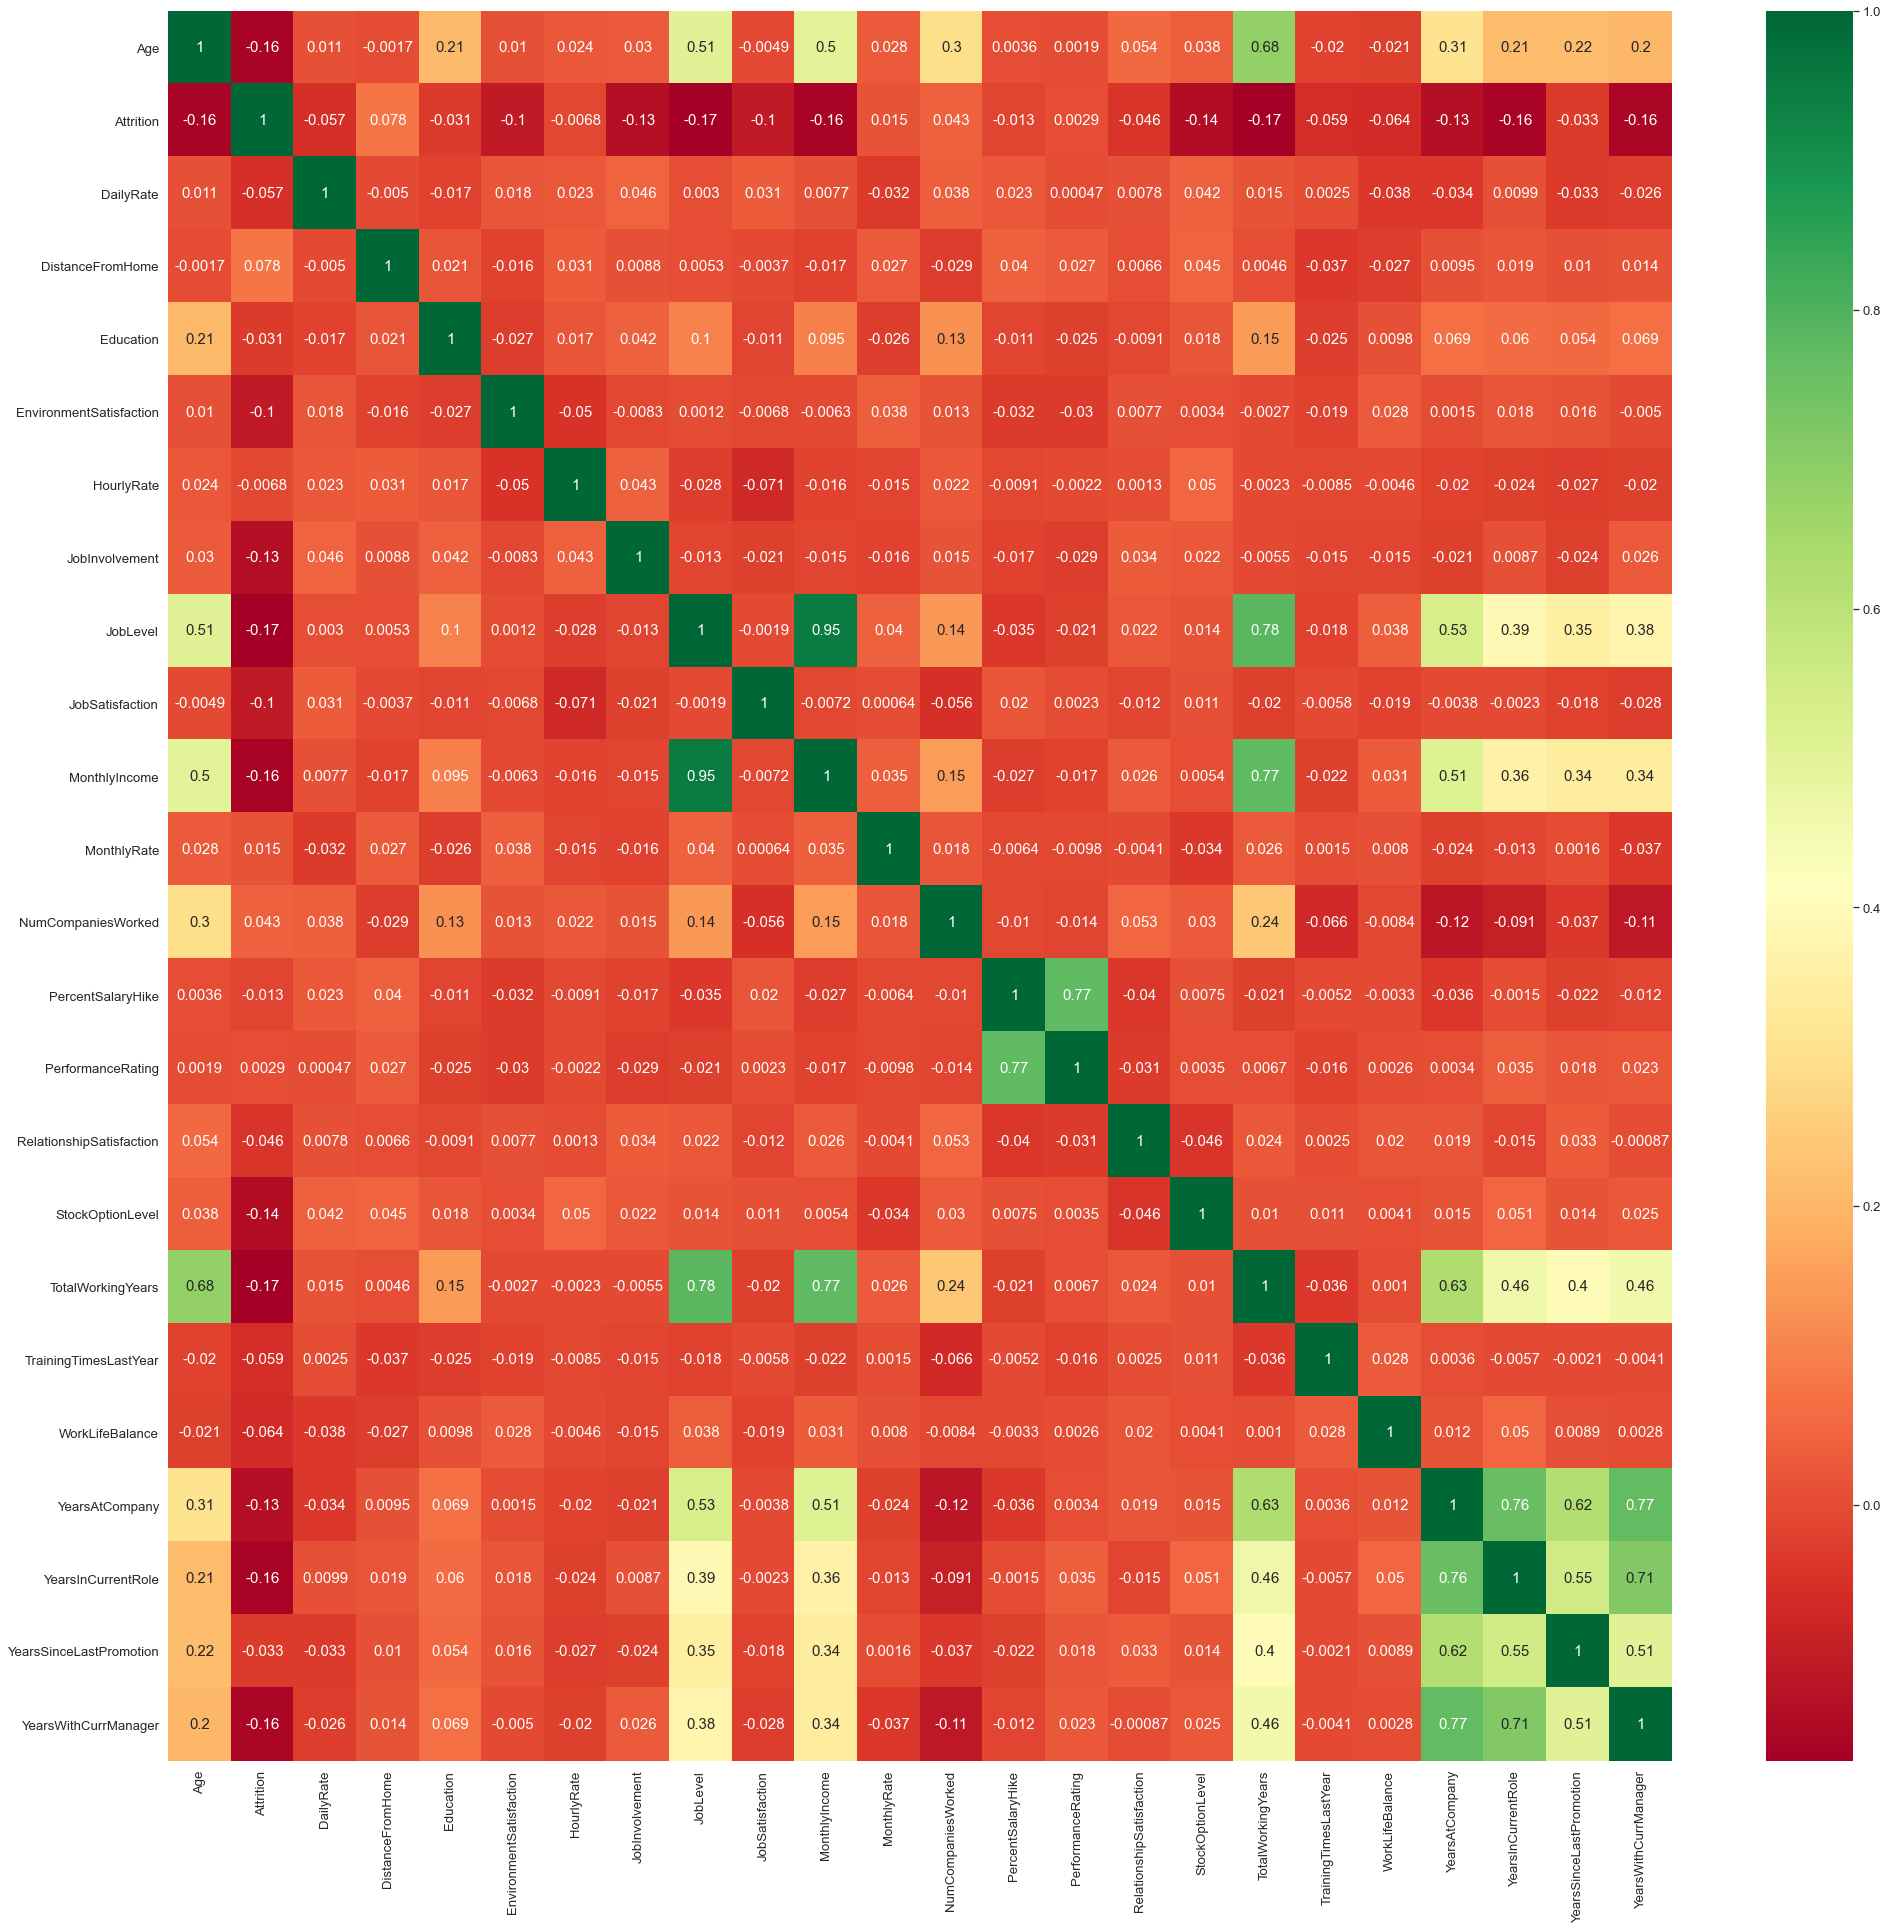

In [40]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={'size':15})

## Data Processing

In [41]:
categorical_col.remove('Attrition')

In [42]:
# Transform categorical data into dummies
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [43]:
X = df.drop('Attrition', axis = 1)
y = df.Attrition

## Application machine learning algorithms 

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n=============================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}")
    elif train==False:
        pred = clf.predict(X_test)
        print("Train Result:\n=============================================")
        print(f"accuracy score: {accuracy_score(y_test, pred):4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_train, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
Confusion Matrix: 
 [[853   0]
 [  0 176]]
Train Result:
accuracy score: 0.777778

Classification Report: 
 	Precision: 0.2597402597402597
	Recall Score: 0.32786885245901637
Confusion Matrix: 
 [[323  57]
 [ 41  20]]



## Decision Tree Classifier Hyperparameter tuning

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini","entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
                 
}

model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

In [48]:
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                             max_depth=6, max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=10, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, presort='deprecated',
                             random_state=42, splitter='best')

In [49]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       random_state=42)

In [50]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                             max_depth=6, max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=10, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, presort='deprecated',
                             random_state=42, splitter='best')

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       random_state=42)

In [51]:
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8882

Classification Report: 
 	Precision: 0.7520661157024794
	Recall Score: 0.5170454545454546
Confusion Matrix: 
 [[823  30]
 [ 85  91]]
Train Result:
accuracy score: 0.854875

Classification Report: 
 	Precision: 0.46153846153846156
	Recall Score: 0.29508196721311475
Confusion Matrix: 
 [[359  21]
 [ 43  18]]



### Visualization of a tree

In [52]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [53]:
from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns)
features.remove("Attrition")

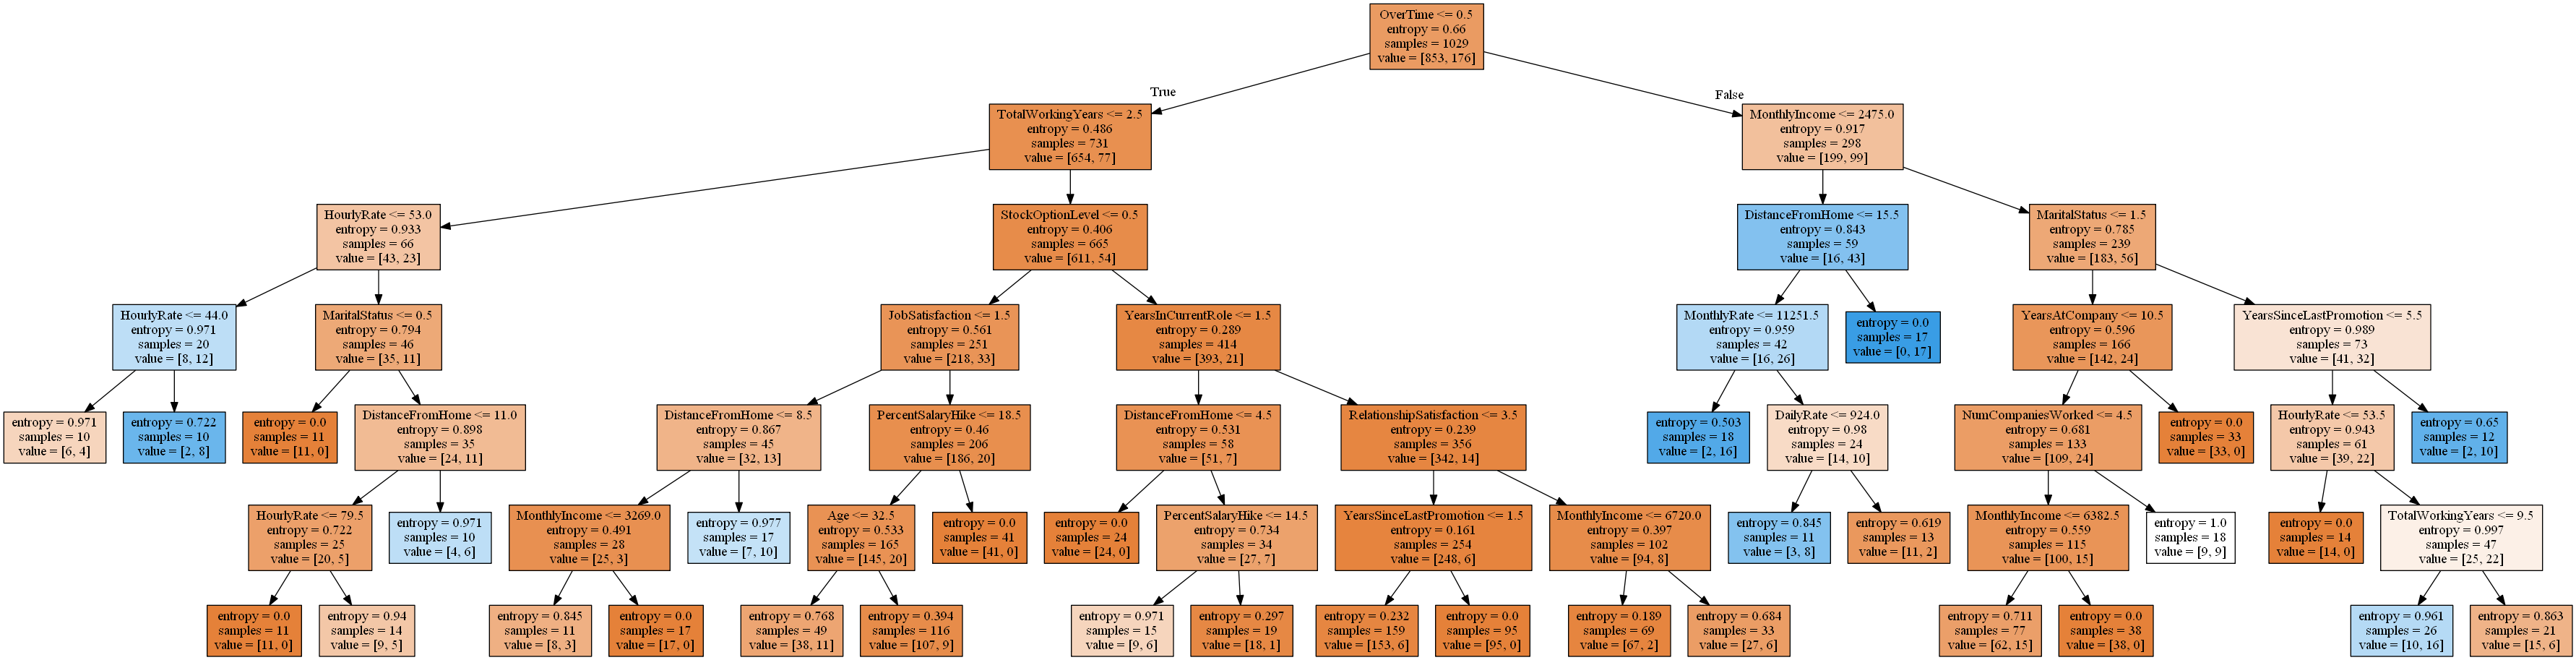

In [54]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())

## Fandom Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators = 100)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
Confusion Matrix: 
 [[853   0]
 [  0 176]]
Train Result:
accuracy score: 0.866213

Classification Report: 
 	Precision: 0.625
	Recall Score: 0.08196721311475409
Confusion Matrix: 
 [[377   3]
 [ 56   5]]

